## RETO DE MINERÍA

In [110]:
import random

def calcular_mineral_valioso(tonelaje_extraido, ley_cabeza, dilucion, recuperacion):
    """
    Calcula la cantidad de mineral valioso extraído en kilogramos.

    Parámetros:
    - tonelaje_extraido (float): Tonelaje total extraído en toneladas.
    - ley_cabeza (float): Porcentaje de mineral valioso.
    - dilucion (float): Porcentaje de dilución.
    - recuperacion (float): Porcentaje de recuperación metalúrgica.

    Retorna:
    - Cantidad de mineral valioso extraído en kilogramos.
    """
    try:
        if any(param < 0 for param in [tonelaje_extraido, ley_cabeza, dilucion, recuperacion]):
            raise ValueError("Los valores no pueden ser negativos.")

        # Convertir los porcentajes a decimales
        ley_cabeza /= 100
        dilucion /= 100
        recuperacion /= 100

        # Cálculo del mineral valioso extraído en kg
        mineral_valioso = tonelaje_extraido * (1 - dilucion) * ley_cabeza * recuperacion * 1000
        
        return round(mineral_valioso, 2)

    except ValueError as e:
        return f"Error: {e}"

# Simulación de 5 bloques con datos aleatorios
def simulacion_extraccion():
    total_mineral_extraido = 0
    for i in range(1, 6):
        tonelaje_extraido = random.uniform(1000, 2000)  # Tonelaje aleatorio entre 1000 y 2000 toneladas
        ley_cabeza = random.uniform(2, 3)  # Ley de cabeza aleatoria entre 2% y 3%
        dilucion = random.uniform(10, 15)  # Dilución aleatoria entre 10% y 15%
        recuperacion = random.uniform(80, 90)  # Recuperación aleatoria entre 80% y 90%

        mineral_valioso = calcular_mineral_valioso(tonelaje_extraido, ley_cabeza, dilucion, recuperacion)
        print(f"Bloque {i}: {mineral_valioso} kg de mineral valioso")
        total_mineral_extraido += mineral_valioso

    print(f"\nTotal de mineral valioso extraído en 5 bloques: {total_mineral_extraido} kg")

# Datos del ejemplo proporcionado
datos = {
    "tonelaje_extraido": 1500,
    "ley_cabeza": 2.5,
    "dilucion": 12,
    "recuperacion": 85
}

# Cálculo del primer caso de ejemplo
dato_ejemplo = calcular_mineral_valioso(**datos)
print(f"Mineral valioso extraído en el ejemplo: {dato_ejemplo} kg")

# Simulación de 5 bloques consecutivos
simulacion_extraccion()

Mineral valioso extraído en el ejemplo: 28050.0 kg
Bloque 1: 26711.72 kg de mineral valioso
Bloque 2: 27583.37 kg de mineral valioso
Bloque 3: 39452.86 kg de mineral valioso
Bloque 4: 32866.82 kg de mineral valioso
Bloque 5: 24270.98 kg de mineral valioso

Total de mineral valioso extraído en 5 bloques: 150885.75 kg


## RETO DE GEOLOGIA

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d.art3d as art3d

perforaciones = {}

def perforacion(nombre, x, y, z, contenido_mineral):
    """Almacena cada perforación con un identificador único."""
    perforaciones[nombre] = (x, y, z, contenido_mineral)

def volumen_mineralizado():
    """
    Calcula el volumen total mineralizado en una zona definida por perforaciones.

    Retorna:
    - Volumen total mineralizado (m³)
    """
    radio = 5 # m - Radio
    area_influencia = np.pi*radio**2 # m2 - Área de Influencia
    volumen = 0 # m3 - Volumen existentes

    # Convertir a lista ordenada para procesar en secuencia
    perforaciones_ordenadas = list(perforaciones.values())

    # Calcular volumen entre cada par de perforaciones
    for i in range(len(perforaciones_ordenadas)-1):
        x1, y1, z1, mineral1 = perforaciones_ordenadas[i]
        x2, y2, z2, mineral2 = perforaciones_ordenadas[i+1]

        # Calcular distancia
        distancia = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

        # Volumen mineralizado
        promedio_mineral = (mineral1 + mineral2)/2
        volumen_parcial = area_influencia * distancia * promedio_mineral
        volumen += volumen_parcial

    return volumen

def graf_perforaciones():
    "Generar una grafica 3D de las perforaciones con área de influencia sombreada"
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = [p[0] for p in perforaciones.values()]
    y = [p[1] for p in perforaciones.values()]
    z = [p[2] for p in perforaciones.values()]
    mine = [p[3] for p in perforaciones.values()]
    sc = ax.scatter(x, y, z, c=mine, cmap='viridis', s=100)

    # Agregar áreas de influencia en 3D
    for px, py, pz in zip(x, y, z):
        # Crear un cilindro como área de influencia
        theta = np.linspace(0, 2 * np.pi, 30)
        circle_x = px + 5 * np.cos(theta)
        circle_y = py + 5 * np.sin(theta)
        circle_z = np.full_like(circle_x, pz)

        verts = [list(zip(circle_x, circle_y, circle_z))]
        ax.add_collection3d(Poly3DCollection(verts, color='blue', alpha=0.2))

    for nombre, (x, y, z, _) in perforaciones.items():
        ax.text(x, y, z, nombre)

    plt.colorbar(sc, label="Contenido Mineral (%)")
    ax.set_title("Distribución de Perforaciones con Áreas de Influencia")
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Y (m)")
    ax.set_zlabel("Z (m)")

    # Interacción para rotación del gráfico
    ax.view_init(elev=25, azim=35)
    def on_move(event):
        if event.button == 1:
            ax.view_init(elev=ax.elev + event.step, azim=ax.azim + event.step)
        fig.canvas.mpl_connect('scroll_event', on_move)

    plt.show()

Volumen mineralizado: 722.5 metros cubicos


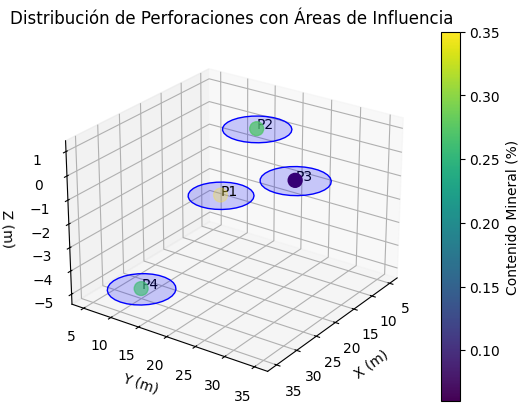

In [112]:
perforacion("P1", 10, 10, -3, 0.35)
perforacion("P2", 15, 20,  1, 0.27)
perforacion("P3", 20, 30,  0, 0.06)
perforacion("P4", 15, 20,  0, 0.16)
perforacion("P4", 30, 10, -5, 0.26)

volumen = volumen_mineralizado()
print(f"Volumen mineralizado: {volumen:.1f} metros cubicos")
graf_perforaciones()

## RETO DE METALURGIA

In [105]:
## RETO DE METALURGIA

def calcular_eficiencia_flotacion(ley_cabeza, tonelaje_mineral, ley_concentrado, tonelaje_concentrado):
    """Calcula la eficiencia del proceso de flotación."""
    if min(ley_cabeza, tonelaje_mineral, ley_concentrado, tonelaje_concentrado) <= 0:
        return "Error: Todos los valores deben ser mayores a cero."

    eficiencia = (ley_concentrado * tonelaje_concentrado) / (ley_cabeza * tonelaje_mineral) * 100
    return round(eficiencia, 2)

# Datos del problema
datos = {
    "ley_cabeza": 4,
    "tonelaje_mineral": 1000,
    "ley_concentrado": 20,
    "tonelaje_concentrado": 150
}

# Cálculo de la eficiencia
print(f"La eficiencia del proceso de flotación es: {calcular_eficiencia_flotacion(**datos)}%")

La eficiencia del proceso de flotación es: 75.0%
